Judul : Mental Disorder Classification  
Oleh  : Fadly Fajary Bagaskara

Pada proyek ini akan digunakan Dataset yang bersumber dari Kaggle, yaitu  
"Mental Disorder Classification" -Chirag Desai  
https://www.kaggle.com/datasets/cid007/mental-disorder-classification  
  
    
Untuk mengambil data, digunakan Kaggle beta API untuk mengunduh dataset tersebut, sehingga diperlukan modul files dari library google.colab  

kemudian unggah file API token yang sudah digenerate pada akun Kaggle sebelumnya

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bgskrr","key":"13b7a797f47fa3c0c2b2dde1b450fd4d"}'}

Mengunduh dataset terpilih dari kaggle. Karena dataset yang diunduh dalam keadaan terkompres, sehingga perlu dilakukan dekompresi file tersebut

In [2]:
!kaggle datasets download cid007/mental-disorder-classification
!unzip mental-disorder-classification.zip

Dataset URL: https://www.kaggle.com/datasets/cid007/mental-disorder-classification
License(s): CC0-1.0
  0% 0.00/2.17k [00:00<?, ?B/s]
100% 2.17k/2.17k [00:00<00:00, 4.73MB/s]
Archive:  mental-disorder-classification.zip
  inflating: Dataset-Mental-Disorders.csv  


Import library dan package yang dibutuhkan seperti untuk pengolahan dokumen csv, visualisasi data, manipulasi data, augmentasi data, pembuatan model, dan evaluasi model.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

Menggunakan package Pandas untuk memuat data di dalam file csv menjadi sebuah dataFrame

In [4]:
df = pd.read_csv('Dataset-Mental-Disorders.csv')
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


Setelah melihat contoh dari data yang akan kita gunakan, terdapat 19 kolom yang terdiri dari:

1. **Patient Number**: Nomor unik yang berfungsi sebagai identitas untuk setiap pasien. Kolom ini adalah nilai nominal yang tidak akan digunakan dalam analisis prediktif, namun penting untuk identifikasi data.
  
2. **Sadness**: Mengukur tingkat kesedihan yang dirasakan pasien.

3. **Euphoric**: Menggambarkan tingkat perasaan euforia atau kebahagiaan ekstrem. Data ini dapat membantu menganalisis pola suasana hati yang berfluktuasi.

4. **Exhausted**: Mengukur frekuensi pasien merasa kelelahan. Nilai dalam kolom ini menunjukkan tingkat energi fisik atau mental dan bisa menjadi indikasi dari kondisi kesehatan mental.

5. **Sleep Disorder**: Menunjukkan apakah pasien memiliki gangguan tidur, seperti insomnia atau gangguan tidur lainnya. Kondisi ini sangat terkait dengan kesehatan mental.

6. **Mood Swing**: Mencatat ada atau tidaknya perubahan suasana hati yang ekstrim pada pasien, yang mungkin menunjukkan kondisi seperti bipolar atau depresi.

7. **Suicidal Thoughts**: Kolom ini mencatat ada atau tidaknya pikiran bunuh diri pada pasien. Ini merupakan indikator yang sangat penting dalam menilai tingkat risiko pasien terkait masalah kesehatan mental.

8. **Anorexia**: Mencatat apakah pasien menunjukkan tanda-tanda anoreksia atau gangguan makan lainnya, yang seringkali berhubungan dengan kondisi psikologis tertentu.

9. **Authority Respect**: Mengukur apakah pasien memiliki tingkat hormat terhadap otoritas. Ini dapat menjadi indikator dari aspek kepribadian yang mungkin relevan dalam analisis kesehatan mental.

10. **Try-Explanation**: Menunjukkan seberapa sering pasien mencoba memberikan penjelasan atas perilaku atau tindakan mereka, yang bisa memberikan wawasan tentang kecenderungan mereka untuk merefleksikan atau memahami diri mereka sendiri.

11. **Aggressive Response**: Menilai respons agresif yang mungkin ditunjukkan oleh pasien dalam situasi tertentu, yang bisa menjadi tanda dari gangguan emosi atau kontrol impuls.

12. **Ignore & Move-On**: Menunjukkan kecenderungan pasien untuk mengabaikan masalah dan melanjutkan hidup, yang mungkin relevan dalam konteks mekanisme koping (coping mechanisms).

13. **Nervous Break-down**: Mencatat ada atau tidaknya kecenderungan pasien untuk mengalami gangguan saraf atau kepanikan, yang dapat menjadi tanda kondisi kecemasan.

14. **Admit Mistakes**: Menunjukkan apakah pasien cenderung mengakui kesalahan mereka, yang bisa memberikan gambaran tentang aspek-aspek tertentu dari kepribadian atau kesehatan mental mereka.

15. **Overthinking**: Mengukur tingkat kecenderungan untuk berpikir berlebihan yang sering kali dikaitkan dengan kondisi kecemasan dan depresi.

16. **Sexual Activity**: Menunjukkan tingkat aktivitas seksual pasien, yang dapat berfungsi sebagai indikator dari pola perilaku tertentu atau kondisi mental.

17. **Concentration**: Menilai kemampuan pasien untuk berkonsentrasi. Konsentrasi yang rendah dapat menjadi gejala dari gangguan mental seperti depresi atau ADHD.

18. **Optimism**: Menunjukkan tingkat optimisme pasien dalam kehidupan mereka, yang berperan sebagai indikator kesejahteraan mental secara umum.

19. **Expert Diagnose**: Kolom ini adalah diagnosis akhir dari ahli mengenai kondisi mental pasien, seperti Bipolar Type-1, Bipolar Type-2, Depresi, atau Normal. Kolom ini berfungsi sebagai variabel target dalam analisis prediktif kita.  

Untuk kolom 2-5 memiliki data kategorikal dengan nilai:
*   Seldom
*   Sometimes
*   Usually
*   Most-Often


Untuk kolom 6-15 memiliki data dalam bentuk boolean yaitu YES dan NO  
Untuk kolom 16-18 memiliki data dengan bentuk scoring, seperti 4 dari 10  
Dan kolom terakhir merupakan data dengan bentuk kategorikal dengan nilai sebagai berikut:
*   Bipolar Type-1
*   Bipolar Type-2
*   Depression
*   Normal  
  
Setiap fitur ini dirancang untuk memberikan gambaran menyeluruh tentang kondisi mental pasien dan merupakan aspek-aspek penting yang digunakan dalam pemodelan prediksi.

Informasi lain mengenai data yang digunakan dapat diketahui dengan memanggil fungsi info(). Informasi yang tertera berupa nama kolom,jumlah data setiap kolom, dan juga tipe data dari setiap kolom tersebut

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient Number       120 non-null    object
 1   Sadness              120 non-null    object
 2   Euphoric             120 non-null    object
 3   Exhausted            120 non-null    object
 4   Sleep dissorder      120 non-null    object
 5   Mood Swing           120 non-null    object
 6   Suicidal thoughts    120 non-null    object
 7   Anorxia              120 non-null    object
 8   Authority Respect    120 non-null    object
 9   Try-Explanation      120 non-null    object
 10  Aggressive Response  120 non-null    object
 11  Ignore & Move-On     120 non-null    object
 12  Nervous Break-down   120 non-null    object
 13  Admit Mistakes       120 non-null    object
 14  Overthinking         120 non-null    object
 15  Sexual Activity      120 non-null    object
 16  Concentr

Menghitung jumlah dari setiap nilai yang ada pada masing masing kolom

In [6]:
for col in df:
  print(df[col].value_counts())

Patient Number
Patiant-01     1
Patiant-02     1
Patiant-89     1
Patiant-88     1
Patiant-87     1
              ..
Patiant-36     1
Patiant-35     1
Patiant-34     1
Patiant-33     1
Patiant-120    1
Name: count, Length: 120, dtype: int64
Sadness
Usually       42
Sometimes     42
Most-Often    20
Seldom        16
Name: count, dtype: int64
Euphoric
Seldom        46
Sometimes     45
Usually       20
Most-Often     9
Name: count, dtype: int64
Exhausted
Sometimes     38
Usually       34
Most-Often    30
Seldom        18
Name: count, dtype: int64
Sleep dissorder
Sometimes     44
Usually       34
Most-Often    21
Seldom        21
Name: count, dtype: int64
Mood Swing
NO     63
YES    57
Name: count, dtype: int64
Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64
Anorxia
NO     74
YES    46
Name: count, dtype: int64
Authority Respect
NO     73
YES    47
Name: count, dtype: int64
Try-Explanation
NO     63
YES    57
Name: count, dtype: int64
Aggressive Response
NO    

Dari hasil di atas, ditemukan nilai yang tidak sesuai yaitu "YES " pada kolom 'Suicidal Thoughts' sehingga perlu dilakukan pembersihan terlebih dahulu dengan melakukan penggantian/replace pada nilai tersebut

In [7]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].replace('YES ', "YES")
df['Suicidal thoughts'].value_counts()

,count
Suicidal thoughts,
NO,63
YES,57


Kolom 'Patient Number' tidak digunakan dengan alasan bahwa kolom tersebut bukan merupakan fitur yang dapat digunakan dalam pembangunan model klasifikasi, sehingga dibuat dataFrame baru dengan mengecualikan kolom tersebut

In [8]:
df_new = df.drop(columns=["Patient Number"], inplace=False)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 16  Optimisi

**Optional**  
Mengubah nama kolom menjadi lowerspace dan juga mengganti whitespace serta simbol lain dengan tanda underscore "_"

In [9]:
for item in df_new:
  renamed_item = item.replace('-', '_').replace('&','').lower()
  joined_item = '_'.join(renamed_item.split())
  df_new.rename(columns={item:joined_item},inplace=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sadness              120 non-null    object
 1   euphoric             120 non-null    object
 2   exhausted            120 non-null    object
 3   sleep_dissorder      120 non-null    object
 4   mood_swing           120 non-null    object
 5   suicidal_thoughts    120 non-null    object
 6   anorxia              120 non-null    object
 7   authority_respect    120 non-null    object
 8   try_explanation      120 non-null    object
 9   aggressive_response  120 non-null    object
 10  ignore_move_on       120 non-null    object
 11  nervous_break_down   120 non-null    object
 12  admit_mistakes       120 non-null    object
 13  overthinking         120 non-null    object
 14  sexual_activity      120 non-null    object
 15  concentration        120 non-null    object
 16  optimisi

Dari informasi yang didapatkan sebelumnya dimana semua kolom bertipe object, perlu dilakukan konversi menjadi data numerikal sehingga dapat dipergunakan sebagai bahan pelatihan model. Proses konversi mencakup pengelompokan kolom berdasarkan jenis datanya, berikut adalah penjelasan dari setiap nilai yang dikonversi:



1.   Kolom binary (YES & NO):  
      *   0 : NO
      *   1 : YES
2.   Kolom Kategorikal:  
      *   0 : Seldom
      *   1 : Sometimes
      *   2 : Usually
      *   3 : Most-Often
3.   Kolom Kategorikal "Expert Diagnose":  
      *   0 : Bipolar Type-1
      *   1 : Bipolar Type-2
      *   2 : Depression
      *   3 : Normal
4.   Kolom Skor, dilakukan ekstraksi pada karakter pertama




In [10]:
# Binary col
binary_col = list(df_new.columns[4:14])
binary_col
for col in binary_col:
  df_new[col] = df_new[col].map({'YES': 1, 'NO': 0}).astype(int)
df_new.head()

,sadness,euphoric,exhausted,sleep_dissorder,mood_swing,suicidal_thoughts,anorxia,authority_respect,try_explanation,aggressive_response,ignore_move_on,nervous_break_down,admit_mistakes,overthinking,sexual_activity,concentration,optimisim,expert_diagnose
0,Usually,Seldom,Sometimes,Sometimes,1,1,0,0,1,0,0,1,1,1,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Usually,Seldom,Usually,Sometimes,0,1,0,0,0,0,0,0,0,0,4 From 10,2 From 10,5 From 10,Depression
2,Sometimes,Most-Often,Sometimes,Sometimes,1,0,0,0,1,1,0,1,1,0,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Usually,Seldom,Usually,Most-Often,1,1,1,0,1,0,0,0,0,0,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Usually,Usually,Sometimes,Sometimes,0,0,0,0,0,0,0,1,1,1,5 From 10,5 From 10,6 From 10,Normal


In [11]:
from sklearn.preprocessing import LabelEncoder
cat_col = list(df_new.columns[:4])
for col in cat_col:
  df_new[col] = df_new[col].map({
    'Seldom': 0,
    'Sometimes': 1,
    'Usually': 2,
    'Most-Often': 3
  }).astype(int)

In [12]:
label_col = 'expert_diagnose'
df_new[label_col]
df_new[label_col] = df_new[label_col].map({
  'Bipolar Type-1': 0,
  'Bipolar Type-2': 1,
  'Depression': 2,
  'Normal': 3
}).astype(int)

In [13]:
range_col = list(df_new.columns[14:17])
for col in range_col:
  df_new[col] = df_new[col].apply(lambda x: int(x[:1]))

In [14]:
df_new.head()

,sadness,euphoric,exhausted,sleep_dissorder,mood_swing,suicidal_thoughts,anorxia,authority_respect,try_explanation,aggressive_response,ignore_move_on,nervous_break_down,admit_mistakes,overthinking,sexual_activity,concentration,optimisim,expert_diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,1
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,2
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,0
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,1
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,3


Membuat visual matriks korelasi dari setiap kolom menggunakan heatmap dari package seaborn

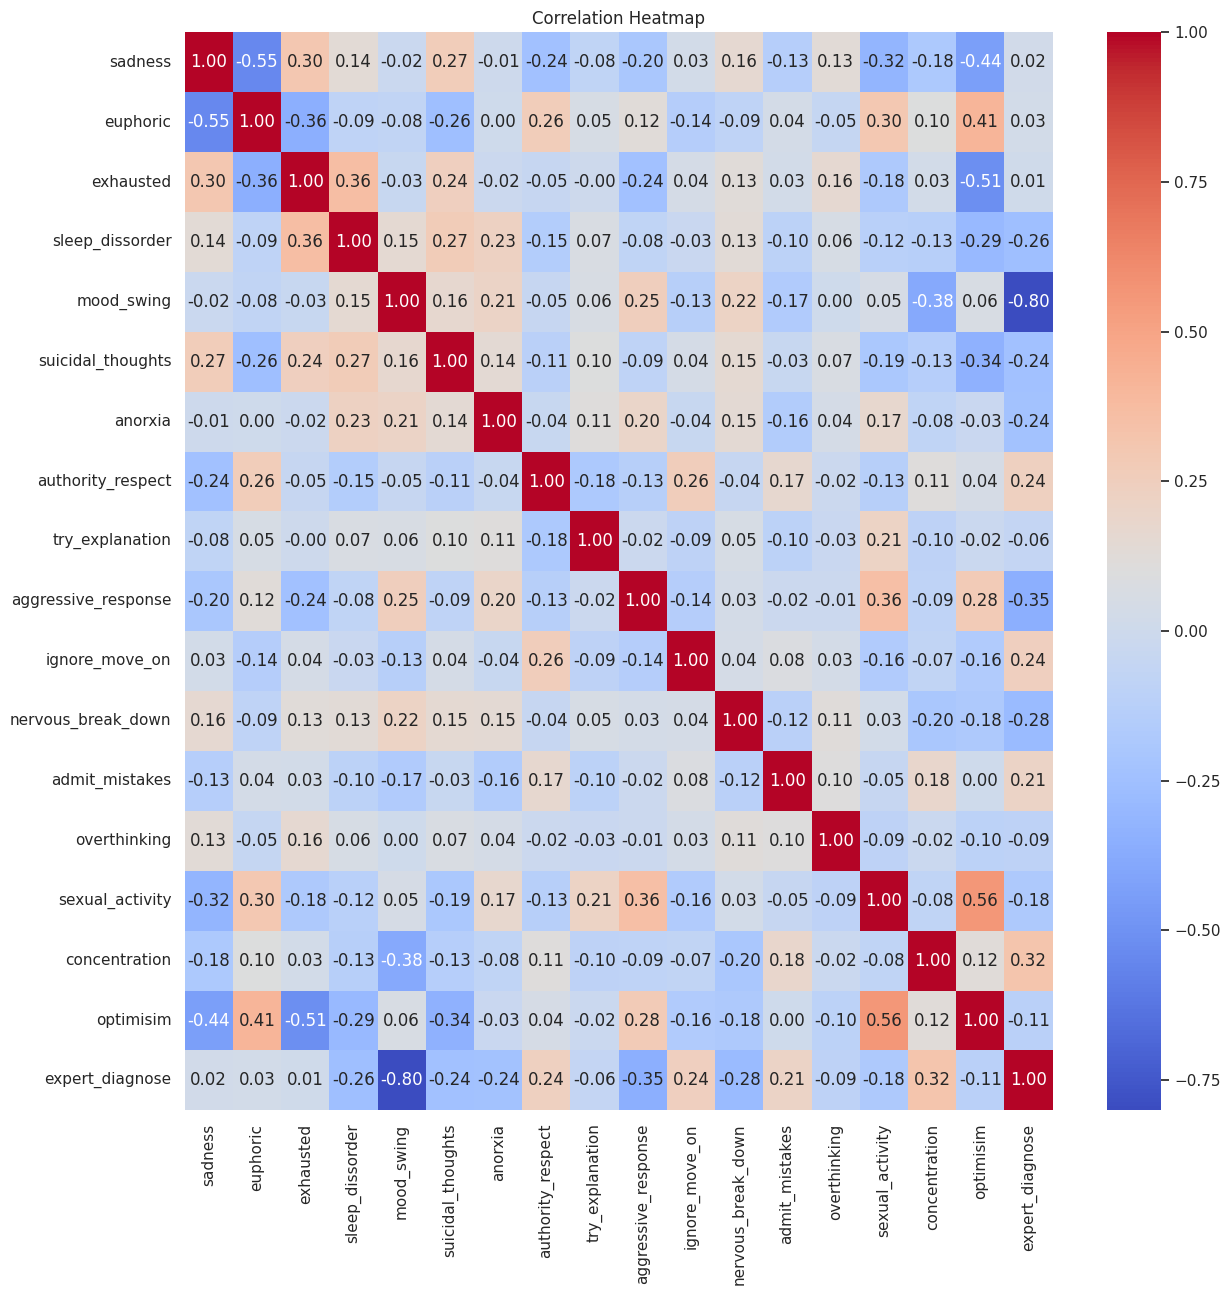

In [15]:
sns.set(style="whitegrid")

correlation_matrix = df_new.corr()

# create a heatmap
plt.figure(figsize=(14, 14))
heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'coolwarm')

plt.title('Correlation Heatmap')
plt.show()

Memisahkan dataset menjadi X dan y untuk fitur dan label. Kemudian, karena jumlah data hanya sebanyak 120, maka akan dilakukan augmentasi menggunakan teknik SMOTE  
  
SMOTE atau Synthetic Minority Oversampling Technique adalah metode oversampling dengan menghasilkan sampel data baru yang berasal dari kelas paling minoritas.  
Sumber : https://arxiv.org/abs/1106.1813

Setelah melakukan augmentasi data hingga mencapai 500 baris, langkah selanjutnya adalah melakukan standarisasi pada dataset. Standarisasi ini bertujuan untuk memastikan bahwa semua fitur memiliki skala yang konsisten dan terstandar, yang tidak hanya membantu dalam menjaga konsistensi nilai antar fitur tetapi juga mengoptimalkan kinerja model, terutama untuk algoritma yang peka terhadap skala data.

Standarisasi dilakukan dengan menggunakan metode StandardScaler, yang akan mengonversi setiap fitur agar memiliki rata-rata 0 dan standar deviasi 1. Proses ini sangat berguna terutama pada algoritma yang melibatkan jarak antar titik data, seperti K-Nearest Neighbors (KNN) atau algoritma berbasis gradien.

Selain standarisasi, Principal Component Analysis (PCA) juga diterapkan pada data. PCA adalah teknik reduksi dimensi yang digunakan untuk mengekstraksi komponen-komponen utama dari dataset, dengan mempertahankan sebanyak mungkin varians

In [16]:
X = df_new.drop(columns=['expert_diagnose'])
y = df_new['expert_diagnose']

target_per_class = 125

sampling_strategy = {}
for label in Counter(y).keys():
    sampling_strategy[label] = target_per_class

smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Resampled class distribution:", Counter(y_resampled))
print(f"Total samples after SMOTE: {X_resampled.shape[0]}")

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_resampled_scaled)

print(f'Number of components selected: {pca.n_components_}')

Resampled class distribution: Counter({1: 125, 2: 125, 0: 125, 3: 125})
Total samples after SMOTE: 500
Number of components selected: 13


Memecah data ke dalam training set dan test set dengan perbandingan 80:20  

Untuk model yang digunakan, K-Nearest Neighbors (KNN) diimplementasikan dengan memanfaatkan package dari Scikit-Learn (sklearn). Algoritma KNN ini akan mencari k tetangga terdekat dari setiap data baru dalam training set untuk melakukan klasifikasi atau regresi berdasarkan kesamaan jarak. Parameter k (jumlah tetangga) dapat disesuaikan untuk mendapatkan hasil prediksi yang optimal, tergantung pada kompleksitas data dan jumlah kelas yang ingin diprediksi.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal']))

Accuracy: 0.93
                precision    recall  f1-score   support

Bipolar Type-1       0.92      0.96      0.94        24
Bipolar Type-2       0.88      1.00      0.93        14
    Depression       0.94      0.91      0.92        33
        Normal       0.96      0.90      0.93        29

      accuracy                           0.93       100
     macro avg       0.92      0.94      0.93       100
  weighted avg       0.93      0.93      0.93       100



Pada langkah ini, dilakukan evaluasi model dengan beberapa metrik, seperti **Akurasi**, yang mengukur seberapa banyak prediksi yang benar dari keseluruhan prediksi; **Presisi**, yang menilai ketepatan prediksi positif model; **Recall**, yang melihat seberapa baik model mendeteksi sampel positif; serta **F1 Score**, yang menggabungkan presisi dan recall untuk keseimbangan. **Confusion Matrix** juga digunakan untuk menganalisis jenis kesalahan yang dibuat model terhadap setiap kelas. Evaluasi ini membantu memahami kinerja model lebih mendalam dan menunjukkan area yang dapat ditingkatkan.

Precision: 0.93
Recall: 0.93
F1 Score: 0.93

Classification Report:
                precision    recall  f1-score   support

Bipolar Type-1       0.92      0.96      0.94        24
Bipolar Type-2       0.88      1.00      0.93        14
    Depression       0.94      0.91      0.92        33
        Normal       0.96      0.90      0.93        29

      accuracy                           0.93       100
     macro avg       0.92      0.94      0.93       100
  weighted avg       0.93      0.93      0.93       100



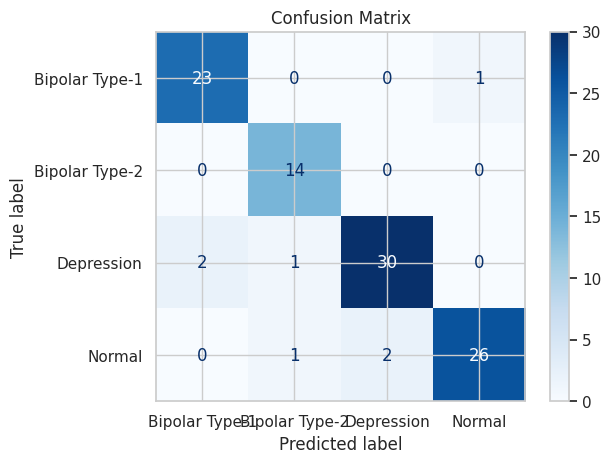

In [18]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal']))

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Bipolar Type-1', 'Bipolar Type-2', 'Depression', 'Normal'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()